<a href="https://colab.research.google.com/github/teaercegovic/Predvidanje_kvalitete_vina_PROJEKT-STROJNO_UCENJE/blob/main/Tea_Ercegovi%C4%87_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predviđanje kvalitete vina**



> Na temelju kemijskih parametara pojedinog vina se želi utvrditi kakva je kvaliteta vina, dobra ili loša.



## Potrebne biblioteke

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Učitavanje podataka

Učitavanje skupa podataka kao skup podataka Pandas

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PROJEKT - STROJNO UČENJE/winequality-red.csv')

In [ ]:
data.shape

(1599, 12)

Skup podataka se sastoji od 12 stupaca i 1599 redova.

In [ ]:
# prikaz prvih pet redova
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# prikaz zadnjih pet redova
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Imamo podatke o vrijednostima 11 kemijskih parametara za 1599 različitih vina. U atributu `quality` je pohranjena informacija o kvaliteti vina, vrijednost između 0 - 10.

Podaci preuzeti sa [kaggle-a](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

In [ ]:
# tipovi podataka svakog od stupca
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
## ima li praznih polja
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Analiza podataka i vizualizacije

In [ ]:
# statističke značajke skupa podataka
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# jednistvene vrijedosti stupca quality
print(data["quality"].unique())

[5 6 7 4 8 3]


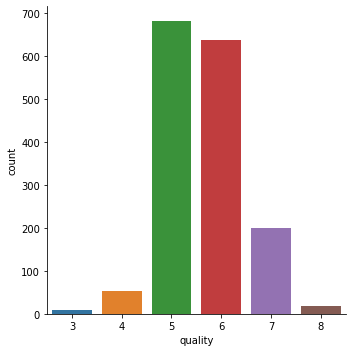

In [ ]:
sns.catplot(x='quality', data=data, kind='count')



> Prikaz količine vina po vrijednosti kvalitete vina. Vidi se da je najviše vina kvalitete 5 i 6.



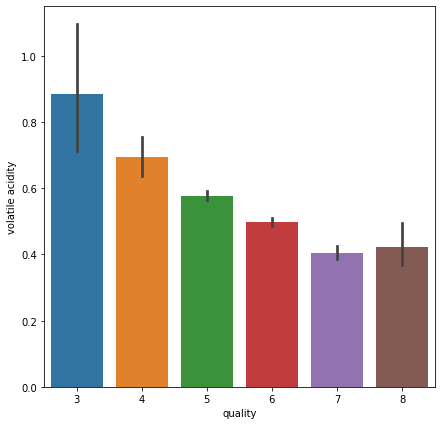

In [ ]:
# volatile acidity vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality', y='volatile acidity', data=data)



> Iz grafa se vidi da što je veća količina hlapljive kiseline u vinu to je manja vrijednost kvalitete vina, manja količina hlapljive kiseline veća vrijednost kvalitete vina.



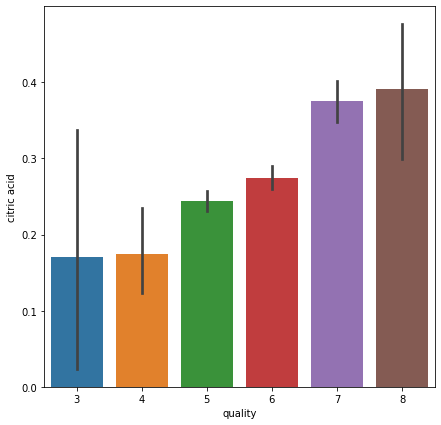

In [ ]:
# citric acid vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality', y='citric acid', data=data)



> Što je manja količina limunske kiseline to je manja kvaliteta vina, veća količina limunske kiseline veća vrijednost kvalitete vina.



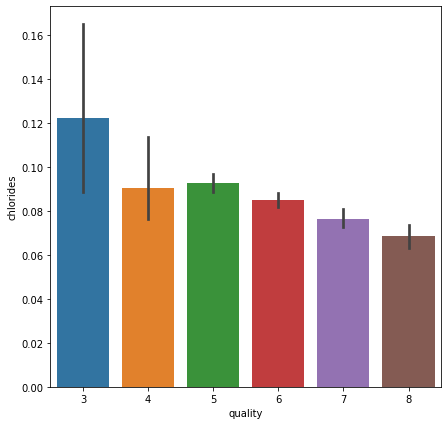

In [ ]:
# chlorides vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality', y='chlorides', data=data)



> Veća količina soli u vinu daje manju vrijednost kvalitete vina, manja količina soli u vinu daje veću vrijednost kvalitete vina.



### Matrica korelacije

Korelacije


1.   Pozitivna korelacija (*veći $x$ $\to$ veći $y$*)
2.   Negativna korelacija (*veći $x$ $\to$ manji $y$*)



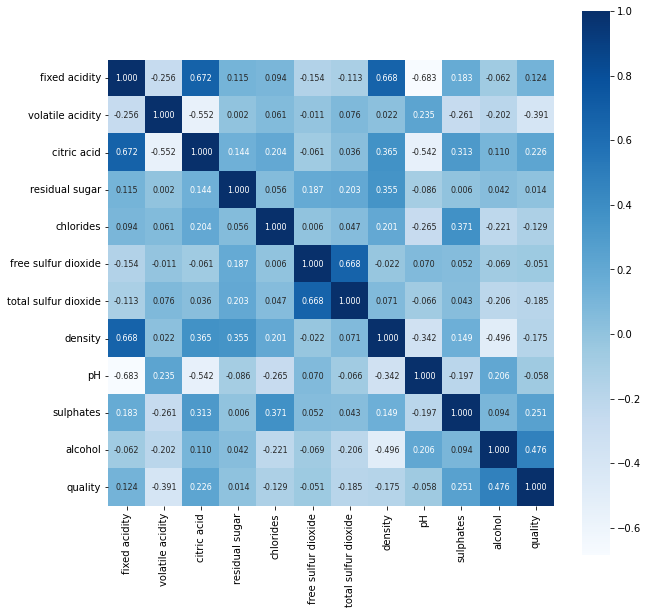

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cbar=True, square=True, 
            fmt = '.3f', annot = True, 
            annot_kws={'size':8}, cmap = 'Blues')



> U pozitivnoj korelaciji s *quality* su *fixsed acidity, citric acid, sulphates, alcohol*, dok su *volatile acidity, chlorides, total sulfur dioxide* u negativnoj korelaciji.



## Podjela podataka

X $\to$ skup podataka koji se sastoji od kemijskih parametara za pojedino vino (početni skup bez stupca *quality*)

In [ ]:
# odvajanje quality od ostalih
X = data.drop('quality',axis=1)

In [ ]:
X.shape

(1599, 11)

In [ ]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


y $\to$ podaci za vijednost kvalitete vina


> vrijednost >= 6, u y će biti 1

> za sve ostale, u y će biti 0





In [ ]:
y = data['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [ ]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


In [ ]:
print(y.unique())

[0 1]


## Train i test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1199,) (400,)


### RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.845


Točnost 84.5%

## Sustav za predviđanje kvalitete vina po unosu kemijskih parametara

Unos prvih 11 parametara za predviđanje kvalitete vina.

In [ ]:
# svi parametri osim parametra kvalitete
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# uneseni podatak u numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[1]
Good Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# svi parametri osim parametra kvalitete
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# uneseni podatak u numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
